# maysics.prep模块使用说明

prep模块有十三个函数

|名称|作用|
|---|---|
|preview_file|数据预览|
|preview|数据预览|
|length_pad|二维长度填充|
|sample_pad|二维样本填充|
|shuffle|打乱数据|
|data_split|数据分离|
|kfold|k折数据分离|
|dataloader|数据随机生成器|
|standard|标准化|
|minmax|归一化|
|normalizer|模缩放至1|
|onehot|onehot编码|
|pca|主成分分析|

<br></br>
## 数据预览：preview_file、preview
preview(data, value_round=3)
<br>preview_file(filename, data, value_round=3)
<br>```filename```：字符串类型，文件名
<br>```data```：二维数组，数据
<br>```value_round```：整型，数字特征保留的小数点后的位数

### 功能说明
预览数据的数字特征
<br>preview_file是将预览结果保存为文件
<br>preview是将预览结果在jupyter中显示
<br>数据预览函数可以直接从maysics中调用

### DEMO 1-1：预览数据特征


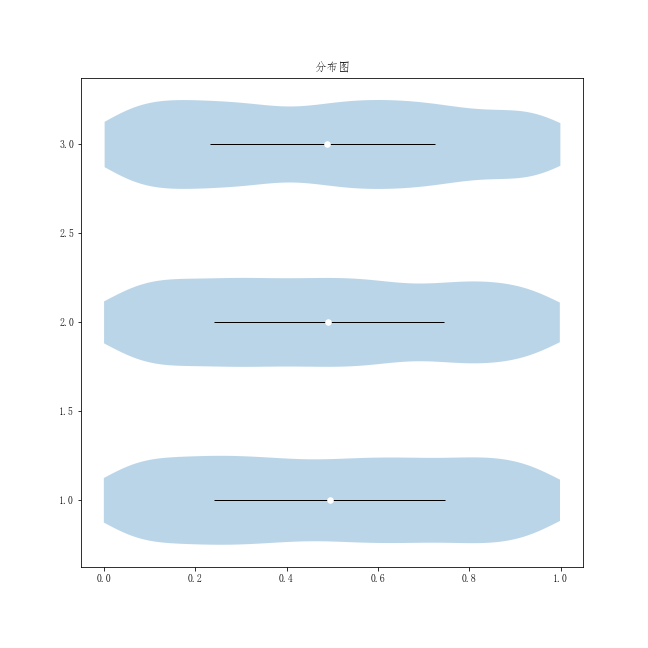
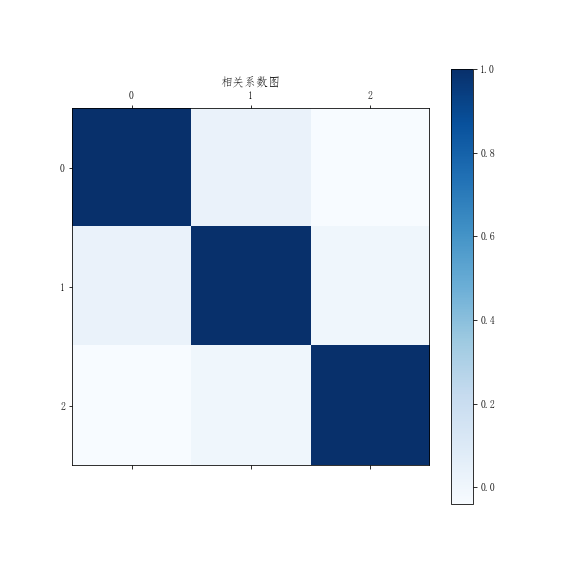
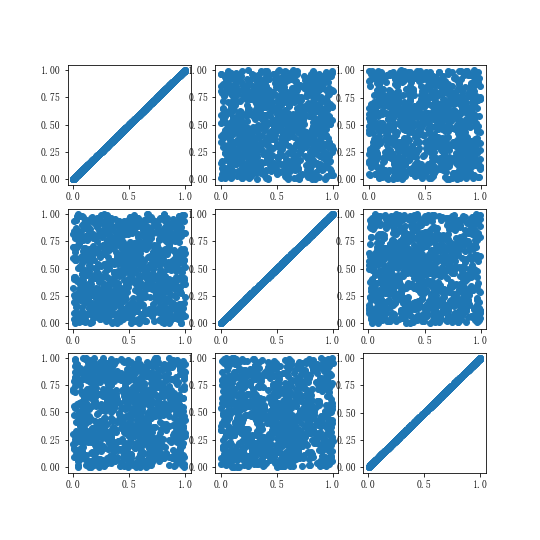

In [1]:
import maysics as ms
import numpy as np

np.random.seed(100)
data = np.random.rand(1000, 3)
ms.preview(data, 3)

### DEMO 1-2：预览数据保存成文件

In [2]:
import maysics as ms
import numpy as np

np.random.seed(100)
data = np.random.rand(1000, 3)
ms.preview_file('data_feature.html', data, 3)

<br></br>
## 二维长度填充：length_pad
length_pad(seq, maxlen=None, value=0, padding='pre', dtype=float)
<br>```seq```：二维列表，需要填充的对象
<br>```maxlen```：整型，可选，每行的最大长度，默认为原二维列表最大的长度
<br>```value```：数类型，可选，填充值
<br>```padding```：字符串类型，可选，填充位置，'pre'代表从前面填充，'post'代表从后面填充
<br>```dtype```：输出的元素类型

### 功能说明
使得每个一维样本的长度相同

### DEMO 2-1：默认参数填充长度

In [3]:
import maysics as ms

data = [[1, 2, 3],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4]]

ms.prep.length_pad(data)

array([[0., 0., 1., 2., 3.],
       [1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4.]])

### DEMO 2-2：用8填充长度

In [4]:
import maysics as ms

data = [[1, 2, 3],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4]]

ms.prep.length_pad(data, value=8)

array([[8., 8., 1., 2., 3.],
       [1., 2., 3., 4., 5.],
       [8., 1., 2., 3., 4.]])

### DEMO 2-3：从后面填充长度

In [5]:
import maysics as ms

data = [[1, 2, 3],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4]]

ms.prep.length_pad(data, padding='post')

array([[1., 2., 3., 0., 0.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 0.]])

<br></br>
## 二维样本填充：sample_pad
sample_pad(data, index=0, padding=None)
<br>```data```：元组或列表类型，数据
<br>```index```：整型，作为扩充全集的标准列的索引
<br>```padding```：填充值

### 功能说明
对data中的每个二维数据进行遍历，以各个index列的值作为全集，再对data的每个二维数据进行填充

### DEMO 3-1：以第一列样本元素为全集

In [6]:
import maysics as ms

data1 = [[0, 1],
         [1, 2],
         [2, 3]]
data2 = [[2, 3],
         [3, 4],
         [4, 5]]

ms.prep.sample_pad((data1, data2))

[array([[0, 1],
        [1, 2],
        [2, 3],
        [3, nan],
        [4, nan]], dtype=object),
 array([[2, 3],
        [3, 4],
        [4, 5],
        [0, nan],
        [1, nan]], dtype=object)]

### DEMO 3-2：以第二列样本元素为全集

In [7]:
import maysics as ms

data1 = [[0, 1],
         [1, 2],
         [2, 3]]
data2 = [[2, 3],
         [3, 4],
         [4, 5]]

ms.prep.sample_pad((data1, data2), index=1)

[array([[0, 1],
        [1, 2],
        [2, 3],
        [nan, 4],
        [nan, 5]], dtype=object),
 array([[2, 3],
        [3, 4],
        [4, 5],
        [nan, 1],
        [nan, 2]], dtype=object)]

### DEMO 3-3：以8为填充值

In [8]:
import maysics as ms

data1 = [[0, 1],
         [1, 2],
         [2, 3]]
data2 = [[2, 3],
         [3, 4],
         [4, 5]]

ms.prep.sample_pad((data1, data2), padding=8)

[array([[0, 1],
        [1, 2],
        [2, 3],
        [3, 8],
        [4, 8]], dtype=object),
 array([[2, 3],
        [3, 4],
        [4, 5],
        [0, 8],
        [1, 8]], dtype=object)]

<br></br>
## 打乱数据：shuffle
shuffle(*arg)

### 功能说明
打乱一个序列或以相同方法打乱多个序列
<br>可以直接从maysics中调用
<br>本身并不返回值，而是直接修改原数据

### DEMO 4-1：打乱一组数据

In [9]:
import maysics as ms
import numpy as np

data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]

np.random.seed(100)
ms.shuffle(data)
data

[[4, 5, 6], [7, 8, 9], [1, 2, 3]]

### DEMO 4-2：以相同顺序打乱两组数据

In [10]:
import maysics as ms
import numpy as np

data1 = [[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3]]

data2 = [1, 2, 3]

np.random.seed(100)
ms.shuffle(data1, data2)
data1, data2

([[2, 2, 2], [3, 3, 3], [1, 1, 1]], [2, 3, 1])

<br></br>
## 数据分离：data_split
data_split(data, targets, train_size=None, test_size=None, shuffle=True, random_state=None)
<br>```data```：数据
<br>```targets```：指标
<br>```train_size```：浮点数类型，训练集占总数据量的比，取值范围为0到1，默认为0.75
<br>```test_size```：浮点数类型，测试集占总数据量的比，取值范围为0到1，当train_size被定义时，该参数无效
<br>```shuffle```：布尔类型，True时表示打乱数据，为False时表示不打乱数据
<br>```random_state```：整型，随机种子

### 功能说明
将数据和指标同时进行等比例分离训练集和测试集

### DEMO 5-1：不打乱分离数据

In [11]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

targets = [1, 2, 3, 4, 5]

X_train, y_train, X_test, y_test = ms.prep.data_split(data, targets)

print('X_train：\n{}\n'.format(X_train))
print('y_train：\n{}\n'.format(y_train))
print('X_test：\n{}\n'.format(X_test))
print('y_test：\n{}'.format(y_test))

X_train：
[[6, 7], [2, 3], [0, 1]]

y_train：
[4, 2, 1]

X_test：
[[4, 5], [8, 9]]

y_test：
[3, 5]


### DEMO 5-2：打乱后分离数据

In [12]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

targets = [1, 2, 3, 4, 5]

X_train, y_train, X_test, y_test = ms.prep.data_split(data, targets, shuffle=True, random_state=100)

print('X_train：\n{}\n'.format(X_train))
print('y_train：\n{}\n'.format(y_train))
print('X_test：\n{}\n'.format(X_test))
print('y_test：\n{}'.format(y_test))

X_train：
[[2, 3], [4, 5], [6, 7]]

y_train：
[2, 3, 4]

X_test：
[[8, 9], [0, 1]]

y_test：
[5, 1]


<br></br>
## k折数据分离：kfold
kfold(data, targets, n, k=5)
<br>```data```：数据
<br>```targets```：指标
<br>```n```：整型，表示将第n折作为验证集，从0开始
<br>```k```：整型，k折验证的折叠数

### 功能说明
将数据和指标均分为k部分，将其中一部分作为验证集，其余k-1部分作为训练集

### DEMO 6-1：k折分离数据，取第一部分为验证集

In [13]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

targets = [1, 2, 3, 4, 5]

X_train, y_train, X_test, y_test = ms.prep.kfold(data, targets, 0)

print('X_train：\n{}\n'.format(X_train))
print('y_train：\n{}\n'.format(y_train))
print('X_test：\n{}\n'.format(X_test))
print('y_test：\n{}'.format(y_test))

X_train：
[[2, 3], [4, 5], [6, 7], [8, 9]]

y_train：
[2, 3, 4, 5]

X_test：
[[0, 1]]

y_test：
[1]


<br></br>
## 数据随机生成器：dataloader
dataloader(data, targets, choose_rate=0.3, shuffle=True, random_state=None)
<br>```data```：数据
<br>```targets```：指标
<br>```choose_rate```：浮点数类型，生成率，即一次生成数据量在原数据量的占比，范围为0到1
<br>```is_shuffle```：布尔类型，True时表示打乱数据，为False时表示不打乱数据
<br>```random_state```：整型，随机种子

### 功能说明
返回一个随机生成数据的生成器

### DEMO 7-1：生成数据随机生成器

In [14]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

targets = [1, 2, 3, 4, 5]

# 设置生成率为20%
data_loader = ms.prep.dataloader(data,
                                 targets,
                                 choose_rate=0.2,
                                 random_state=100)

while True:
    try:
        print(next(data_loader))
    except:
        break

([[2, 3]], [2])
([[4, 5]], [3])
([[6, 7]], [4])
([[8, 9]], [5])
([[0, 1]], [1])


<br></br>
## 数据标准化：standard
standard(data, mean=True, var=True, index=None)
<br>```data```：数据
<br>```mean```：布尔类型或ndarray，True和False决定是否将均值调整为0，也可以输入ndarray用于设定不同的均值
<br>```var```：布尔类型或ndarray，True和False决定是否将方差调整为1，也可以ndarray用于设定不同的方差
<br>```index```：列表类型，需要进行标准化的列的索引，默认为全部

### 原理
$z=\frac{x-\mu}{\sigma}$
<br>$z$：新数据；$x$：原数据；$\mu$：均值；$\sigma$：方差
<br>如果某一列数据完全相同（即$\sigma=0$），则该列数据全部归零

### DEMO 8-1：将数据标准化

In [15]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

ms.standard(data)[0]

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### DEMO 8-2：不减均值/不除以方差的数据标准化

In [16]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

print('不减均值：\n{}\n'.format(ms.standard(data, mean=False)[0]))
print('不除以方差：\n{}'.format(ms.standard(data, var=False)[0]))

不减均值：
[[0.         0.35355339]
 [0.70710678 1.06066017]
 [1.41421356 1.76776695]
 [2.12132034 2.47487373]
 [2.82842712 3.18198052]]

不除以方差：
[[-4. -4.]
 [-2. -2.]
 [ 0.  0.]
 [ 2.  2.]
 [ 4.  4.]]


### DEMO 8-3：设置均值/方差为8的数据标准化

In [17]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

print('设置均值为8：\n{}\n'.format(ms.standard(data, var=[8, 8])[0]))
print('设置方差为8：\n{}'.format(ms.standard(data, mean=[8, 8])[0]))

设置均值为8：
[[-0.5  -0.5 ]
 [-0.25 -0.25]
 [ 0.    0.  ]
 [ 0.25  0.25]
 [ 0.5   0.5 ]]

设置方差为8：
[[-2.82842712 -2.47487373]
 [-2.12132034 -1.76776695]
 [-1.41421356 -1.06066017]
 [-0.70710678 -0.35355339]
 [ 0.          0.35355339]]


### DEMO 8-4：将数据的第二第三列标准化

In [18]:
import maysics as ms

data = [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [9, 10, 11],
        [12, 13, 14]]

ms.standard(data, index=[1, 2])[0]

array([[ 0.        , -1.41421356, -1.41421356],
       [ 3.        , -0.70710678, -0.70710678],
       [ 6.        ,  0.        ,  0.        ],
       [ 9.        ,  0.70710678,  0.70710678],
       [12.        ,  1.41421356,  1.41421356]])

### DEMO 8-5：将第二组数据以第一组数据的均值方差标准化

In [19]:
import maysics as ms

data1 = [[0, 1],
         [2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]

data2 = [[1, 2],
         [3, 4],
         [5, 6],
         [7, 8],
         [9, 10]]

mean, var = ms.standard(data1)[1:]
ms.standard(data2, mean=mean, var=var)[0]

array([[-1.06066017, -1.06066017],
       [-0.35355339, -0.35355339],
       [ 0.35355339,  0.35355339],
       [ 1.06066017,  1.06066017],
       [ 1.76776695,  1.76776695]])

<br></br>
## 数据归一化：minmax
minmax(data, feature_range=(0, 1), min_max=None, index=None)
<br>```data```：数据
<br>```feature_range```：元组类型，缩放的目标范围
<br>```min_max```：元组类型，最大值和最小值
<br>```index```：列表类型，是需要进行标准化的列的索引，默认为全部

### 原理
将数据缩放至某个范围

### DEMO 9-1：将数据归一化

In [20]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

ms.minmax(data)[0]

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

### DEMO 9-2：将数据归一化到$[-2, 2]$

In [21]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

ms.minmax(data, feature_range=(-2, 2))[0]

array([[-2., -2.],
       [-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.]])

### DEMO 9-3：将数据的第二第三列归一化

In [22]:
import maysics as ms

data = [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [9, 10, 11],
        [12, 13, 14]]

ms.minmax(data, index=[1, 2])[0]

array([[ 0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.25,  0.25],
       [ 6.  ,  0.5 ,  0.5 ],
       [ 9.  ,  0.75,  0.75],
       [12.  ,  1.  ,  1.  ]])

### DEMO 9-4：将第二组数据以第一组数据的最值归一化

In [23]:
import maysics as ms

data1 = [[0, 1],
         [2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]

data2 = [[1, 2],
         [3, 4],
         [5, 6],
         [7, 8],
         [9, 10]]

min_max = ms.minmax(data1)[1]
ms.minmax(data2, min_max=min_max)[0]

array([[0.125, 0.125],
       [0.375, 0.375],
       [0.625, 0.625],
       [0.875, 0.875],
       [1.125, 1.125]])

<br></br>
## 将数据的模转化为1：normalizer
normalizer(data, index=None, norm=2)
<br>```data```：数据
<br>```index```：列表类型，需要进行标准化的列的索引，默认为全部
<br>```norm```：整型或字符串类型，可选大于0的整数或'max'，当norm为整数p时，表示进行lp正则化；当norm='max'时，表示使用最大范数进行正则化

### 原理
使二维数据每一行有：$\Sigma x_{i}^{2}=1$

### DEMO 10-1：将数据的模转化为1

In [24]:
import maysics as ms

data = [[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]

ms.normalizer(data)

array([[0.        , 1.        ],
       [0.5547002 , 0.83205029],
       [0.62469505, 0.78086881],
       [0.65079137, 0.7592566 ],
       [0.66436384, 0.74740932]])

### DEMO 10-2：将数据第二第三列归一化的模转化为1

In [25]:
import maysics as ms

data = [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [9, 10, 11],
        [12, 13, 14]]

ms.normalizer(data, index=[1, 2])

array([[ 0.        ,  0.4472136 ,  0.89442719],
       [ 3.        ,  0.62469505,  0.78086881],
       [ 6.        ,  0.65850461,  0.75257669],
       [ 9.        ,  0.67267279,  0.73994007],
       [12.        ,  0.6804511 ,  0.73279349]])

<br></br>
## 主成分分析：pca
pca(data, n=None, eig_vector=None)
<br>```data```：二维数组，数据
<br>```n```：数类型，当```n``` >= 1时，表示降至n维，当0< ```n``` < 1时，表示降维至累计方差贡献率 >= n，默认不降维
<br>```eig_vector```：元组类型，用于设定不同的特征向量，当设置该参数时，参数```n```无意义

### 原理
$$C=cov(X^{T})$$
$$Y=XP$$
<br>$C$是各组数据的$n\times n$协方差矩阵，$X$是$l\times n$二维数据矩阵
<br>$Y$是转换后的$l\times m$二维数据矩阵，$P$是矩阵$C$的$m$个特征列向量组成的$n\times m$矩阵

### DEMO 11-1：通过pca将数据降维至三维

In [26]:
import maysics as ms
import numpy as np

np.random.seed(100)
data = np.random.normal(size=(10, 10))
ms.prep.pca(data, 3)[0]

array([[-2.26029809, -0.01673217,  0.45325466],
       [ 0.15259403, -0.44717169, -0.23042988],
       [ 2.01412288, -0.61411941,  0.20359337],
       [-1.04558089,  1.62143069, -2.56650451],
       [-0.66453704,  2.3709166 ,  1.92876994],
       [ 0.00802919, -0.77620264,  0.68392798],
       [-0.16085091, -2.07425245, -0.28905345],
       [-2.72735305, -0.18918144, -0.72026885],
       [ 0.8369049 ,  0.19439855, -1.66777154],
       [-2.87519848, -1.58227152, -0.04951675]])

### DEMO 11-2：通过pca将数据降维至累计方差贡献率不低于30%

In [27]:
import maysics as ms
import numpy as np

np.random.seed(100)
data = np.random.normal(size=(10, 10))
ms.prep.pca(data, 0.3)[0]

array([[-2.26029809, -0.01673217],
       [ 0.15259403, -0.44717169],
       [ 2.01412288, -0.61411941],
       [-1.04558089,  1.62143069],
       [-0.66453704,  2.3709166 ],
       [ 0.00802919, -0.77620264],
       [-0.16085091, -2.07425245],
       [-2.72735305, -0.18918144],
       [ 0.8369049 ,  0.19439855],
       [-2.87519848, -1.58227152]])

### DEMO 11-3：查看降维后的累计方差贡献率、方差、方差贡献率

In [28]:
import maysics as ms
import numpy as np

np.random.seed(100)
data = np.random.normal(size=(10, 10))
contri, eig_value, eig_ratio = ms.prep.pca(data, 3)[1]

print('累计方差贡献率：{}\n各主成分方差：{}\n各主成分方差贡献率：{}'.format(contri, eig_value, eig_ratio))

累计方差贡献率：0.6655725588710837
各主成分方差：[2.51517633 1.7867636  1.55033846]
各主成分方差贡献率：[0.28604797 0.20320647 0.17631812]


### DEMO 11-4：将第二组数据以第一组的方差进行降维

In [29]:
import maysics as ms
import numpy as np

np.random.seed(100)
data1 = np.random.normal(size=(10, 10))
data2 = np.random.normal(size=(10, 10))

eig_vector = ms.prep.pca(data1, 3)[2]
ms.prep.pca(data2, eig_vector=eig_vector)[0]

array([[-0.16255318,  0.19167731, -0.99502005],
       [-0.35316902,  0.45885362,  0.44274803],
       [-0.24051326, -0.57486837,  0.73777844],
       [-1.00691215, -0.61759289,  1.20217865],
       [-1.8446498 , -0.07874351,  1.20766014],
       [ 0.65796498,  0.05763341, -1.59966579],
       [-0.87507869,  1.44167643,  1.39267246],
       [-0.10402051, -0.5413044 , -1.06927761],
       [-1.33549254,  0.30346526,  0.97234847],
       [ 1.92853099,  0.60519218,  0.41096917]])